In [49]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

In [182]:
def getSkewAngle(cvImage):
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 2))
    dilate = cv2.dilate(thresh, kernel, iterations=5)
    plt.imshow(dilate)
    plt.show()
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    
    allContourAngles = [cv2.minAreaRect(c)[-1] for c in contours]
    angle = sum(allContourAngles) / len(allContourAngles)
    
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

In [178]:
def rotateImage(cvImage, angle):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [179]:
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

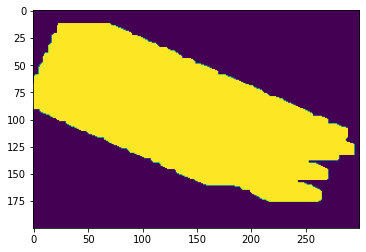

time :  0.11870813369750977


In [183]:
image = cv2.imread("straighten-skewed-text-in-a-scanned-document.png")
start = time.time()
newImage = deskew(image)
print("time : ",time.time()-start)

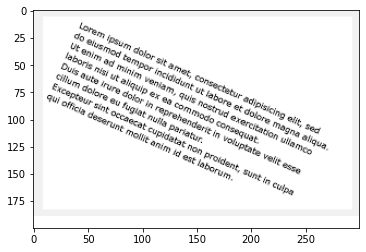

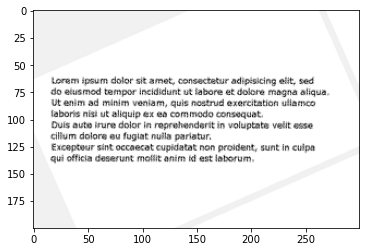

In [184]:
plt.imshow(image)
plt.show()
plt.imshow(newImage)
plt.show()

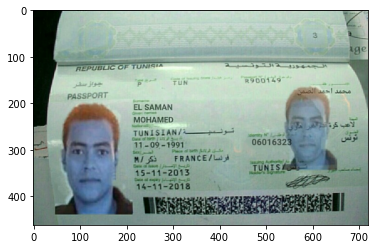

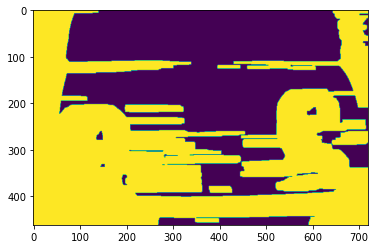

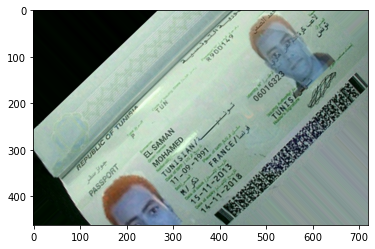

In [185]:
passport_test = cv2.imread("testing.jpg")
plt.imshow(passport_test)
plt.show()
passport = deskew(passport_test)
plt.imshow(passport)
plt.show()

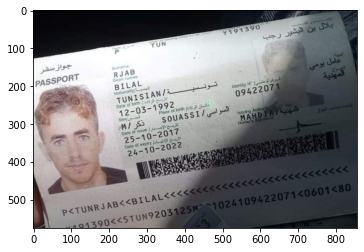

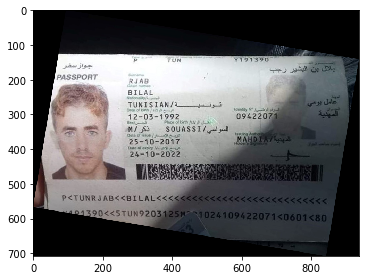

In [192]:
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rotate

from deskew import determine_skew

passport_test = io.imread('testing.jpg')
grayscale = rgb2gray(passport_test)
angle = determine_skew(grayscale)
rotated = rotate(passport_test, angle, resize=True) 
plt.imshow(passport_test)
plt.show()
io.imshow(rotated)
plt.show()